<a href="https://www.kaggle.com/code/kaggleashwin/wine-quality-prediction-using-neural-network?scriptVersionId=139364235" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

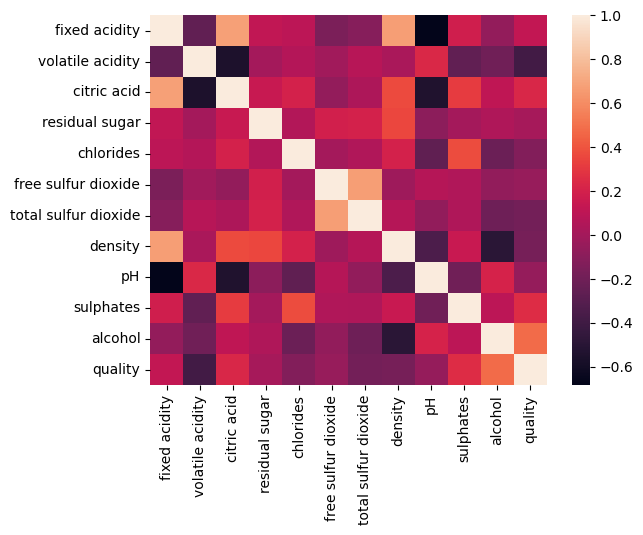

In [6]:
cor = df.corr()
import seaborn as sns

sns.heatmap(cor)

In [7]:
X = df.drop(['quality'], axis=1)

y = df['quality']

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [10]:
input_index = df.shape[1]-1

In [11]:
model = keras.Sequential([
    layers.Dense(512,activation='relu',input_shape=[input_index]),
    layers.Dense(256,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(10)
])

In [12]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [13]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=128,
    epochs=100,
)

Epoch 1/100
10/10 [==============================] - 1s 34ms/step - loss: 2.8455 - val_loss: 1.4921
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 1.0207 - val_loss: 0.6652
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6772 - val_loss: 0.5986
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6029 - val_loss: 0.5903
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5906 - val_loss: 0.6183
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5902 - val_loss: 0.6465
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6108 - val_loss: 0.6062
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5765 - val_loss: 0.5656
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5495 - val_loss: 0.5783
Epoch 10/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5464 - val_loss: 0.5588
E

<Axes: title={'center': 'Cross-entropy'}>

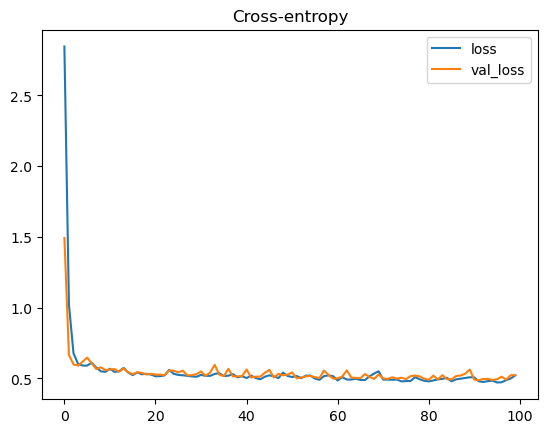

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")

In [15]:
# implementing early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
3/3 [==============================] - 0s 59ms/step - loss: 0.5005 - val_loss: 0.5131
Epoch 2/200
3/3 [==============================] - 0s 26ms/step - loss: 0.4930 - val_loss: 0.5185
Epoch 3/200
3/3 [==============================] - 0s 26ms/step - loss: 0.4843 - val_loss: 0.4982
Epoch 4/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4791 - val_loss: 0.4904
Epoch 5/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4766 - val_loss: 0.4904
Epoch 6/200
3/3 [==============================] - 0s 24ms/step - loss: 0.4705 - val_loss: 0.4952
Epoch 7/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4725 - val_loss: 0.5009
Epoch 8/200
3/3 [==============================] - 0s 26ms/step - loss: 0.4811 - val_loss: 0.4858
Epoch 9/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4727 - val_loss: 0.4982
Epoch 10/200
3/3 [==============================] - 0s 33ms/step - loss: 0.4780 - val_loss: 0.4883
Epoch 11/200
3/3 [=

<Axes: title={'center': 'Cross-entropy'}>

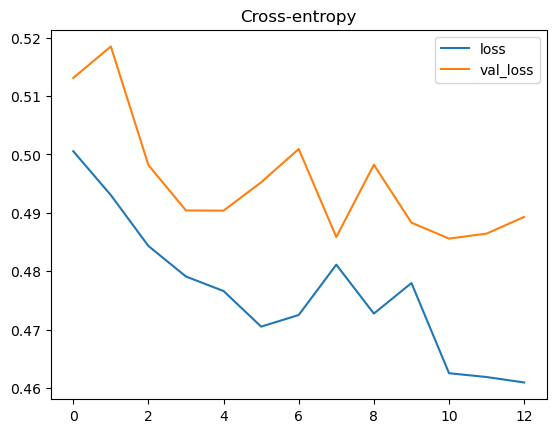

In [16]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")